# Mount drive

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#%cd drive/'My Drive'/projects/deep_learning_school/12_CNNs_architectures/

/content/drive/My Drive/projects/deep_learning_school/12_CNNs_architectures


In [ ]:
%ls

sample_data/


<p style="align: center;"><img src="https://static.tildacdn.com/tild6636-3531-4239-b465-376364646465/Deep_Learning_School.png", width=550, height=300></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Transfer Learning</b></h3>

Как Вы уже знаете (если не знаете, рекомендуем посмотреть [5-ую](https://www.youtube.com/watch?v=cAJp2hh-_q8&t=4831s) и [6-ую](https://www.youtube.com/watch?v=RVk2RUW9Euk&t=40s) лекции нашего курса), в современных задачах обработки изображений, будь то задача обнаружения объектов, задача распознавания образов, задача (семантической) сегментации, задача классификации изображений и другие, всё чаще используют **свёрточные нейросети** (*Convolutional Neural Networks*, *CNN*).

Они показывают очень хорошие результаты, за ними стоит как [математический аппарат](https://stats.stackexchange.com/questions/269854/are-there-mathematical-reasons-for-convolution-in-neural-networks-beyond-expedie), так и эвристики, полученные опытным путём.

В данном задании Вам предстоит познакомиться с архитектурами *AlexNet*, *VGG* и *Inception* и для каждой из этих моделей использовать технику **Transfer Learning**.  

* **Transfer Learning** - это процесс дообучения на **новых данных** какой-либо нейросети, уже обученной до этого на других данных, обычно на каком-нибудь хорошем, большом (миллионы картинок) датасете (например, [ImageNet](http://www.image-net.org/) ~ 14 млн картинок).

<h2 style="text-align: center;"><b>AlexNet</b></h2>

**AlexNet** - нейронная сеть, которая победила в ILSVRC (соревнование по классификации картинок из ImageNet) в 2012 году и стала основой для многих других архитектур. Впервые она была представлена в статье  “ImageNet Classification with Deep Convolutional Neural Networks”, над которой работал Джоффри Хинтон - человек, которого многие называют отцом современного computer vision.

Архитектура описана на картинке ниже

<img src="https://www.learnopencv.com/wp-content/uploads/2018/05/AlexNet-1.png">

**AlexNet** состоит из 5 **сверточных** слоев, 3 **MaxPool** слоев и 2 **FullyConnected** слоев в конце. Обратите внимание, что в последнем пулинг слое окна, из которых берется максимум, пересекаются за счет того, что *stride*=2. Это изменение по сравнению с традиционным пулингом помогло снизить ошибку на 0.4%.

По сути **AlexNet** это самая базовая архитектура для сверточной сети после LeNet, которую мы уже писали на предыдущем занятии.

<h2 style="text-align: center;"><b>VGG</b></h3>

Один **сверточный** слой с фильтром 5$\times$5 можно заменить двумя подряд идущими слоями с фильтрами размером 3$\times$3, так как **воспринимаемая область** картинки у них будет одинаковой. При этом уменьшиться количество параметров, поэтому такую сеть будет легче обучать. 

На момент создания VGG люди уже заметили, что чем больше слоев в нейросети, тем выше ее точность. Заменяя большие фильтры на несколько фильтров 3$\times$3 исследователи получили глубокую нейросеть с меньшим количеством параметров. Архитектура VGG-16 (версии VGG с 16 слоями) представлена на картинке ниже:


<img src="https://cdn-images-1.medium.com/max/1040/1*0Tk4JclhGOCR_uLe6RKvUQ.png">

Когда говорят **VGG**, то чаще всего имеют ввиду **VGG-16** или **VGG-19**. Более глубоких версий **VGG** нет, так как после 19 слоев точность начинает падать.

Чтобы добиться высоких результатов в соревновании при обучении и валидации нейросети использовались дополнительные премы, подробнее о которых можно прочитать в [статье на Medium](https://medium.com/coinmonks/paper-review-of-vggnet-1st-runner-up-of-ilsvlc-2014-image-classification-d02355543a11).


<h2 style="text-align: center;"><b>Inception v1</b></h3>

### Рассмотрим идею, которая подтолкнула исследователей к созданию этой архитектуры.

Площадь, которую занимает классифицируемый объект, может очень сильно отличаться. Пример на картинке ниже: 

<img src="https://cdn-images-1.medium.com/max/1040/1*aBdPBGAeta-_AM4aEyqeTQ.jpeg">

* Для извлечения информации с большой площади лучше всего подходят **большие** фильтры, и наоборот для маленьких объектов лучше **маленькие** фильтры. 
* Глубокие нейронные сети намного сложнее обучать: в них появляется проблема **затухания градиента** и они **переобучаются**.
Чтобы решить первую проблему исследователи придумали **Incepton** модуль, который применяет фильтры разного размера и затем склеивает полученные каналы. При этом извлекается как информация из больших объектов, так и из маленьких. Простейшая реализация модуля выглядит так:
<img src="https://cdn-images-1.medium.com/max/1040/1*DKjGRDd_lJeUfVlY50ojOA.png">

Реализацию можно сделать более эффективной, если сначала уменьшить количество каналов с помощью **сверточного слоя** 1$\times$1 и лишь затем применить **слой** с фильтрами 5$\times$5. Сокращение вычислений происходит за счет того, что мы сначала **уменьшаем размерность** данных и лишь затем преобразовываем их. Продвинутая реализация:
<img src="https://cdn-images-1.medium.com/max/1040/1*U_McJnp7Fnif-lw9iIC5Bw.png">

Сеть состоит из **корня** (нескольких сверточных слоев) и **Inception** модулей идущих за ним. Оранжевым прямоугольников выделен корень, а фиолетовыми - **вспомогательные классификаторы**. Именно они помогают бороться со второй проблемой, которую мы упомянули ранее. Наша функция потерь - взвешенная сумма **LogLoss** на двух **вспомогательных классификаторах** и **основном** в конце нейронной сети.
<img src="https://cdn-images-1.medium.com/max/1040/1*uW81y16b-ptBDV8SIT1beQ.png">

После Inception v1 были представлены 2, 3 и 4 версии, пррочитать о которых вы можете  в [статье на Medium](https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202).

<h2 style="text-align: center;"><b>Transfer Learning</b></h3>

Теперь мы перейдем к тому, как можно использовать уже обученные нейросети, чтобы ускорить свою работу.

Давайте вспомним общую архитектуру CNN:

<img src="https://drive.google.com/uc?id=14pApKqQjnmWMXazY0HHjREn9rI9uwCQg">

С помощью операций *свёртки (convolution)* и *пулинга (pooling)* всё, что расположено до этапа *classification*, по сути **извлекает признаки из объектов, подающихся на вход** (картинок, в данном случае). То есть вместо того, чтобы самим пытаться как-то описать картинки для хорошей работы классификатора, мы предоставляем заняться этим нейросети (обучая её методом обратного распространения ошибки ([лекция 4](https://www.youtube.com/watch?v=HZDOhHAg5_g))).

**Вопрос (творческий):**  А какие признаки для картинок приходят Вам в голову? (считать, что картинки цветные (3 канала), все одинакового размера)

**Ответ:** <Ваши мысли>

<h2 style="text-align: center;"><b>Описание метода</b></h3>

Представим теперь, что eсть свой набор данных, и Вы хотите научить сеть классифицировать объекты из Вашей выборки.  
Есть 4 возможных подхода к задаче:

* **1. Написать свою собственную нейронную сеть**
    * Если Вас зовут не Ian Godfellow, Geoffry Hinton или Andrew Ng, то не рекомендуется пользоваться этим способом
    * May the force be with You

* **2. CNN как средство для извлечения признаков (Feature Extractor)** 
    * Берём сетку, обученную на ImageNet 
    * Убираем последние Fully-Connected слои сети, отвечающие за классификацию. Веса предыдущих слоёв **заморожены**, мы их не трогаем. Теперь сеть выдаёт не метки классов, а то, что поступало на вход Fully-Connected (развёрнутый в строку "параллелепипед" HxWxNUM_FILTERS с последнего слоя перед FC)
    * Запускаем сеть на новом датасете, получаем выходы сети для всех объектов - это и есть их признаки, полученные сетью
    * Обучаем на этих признаках какой-либо классификатор (свою Fully-Connected сеть, например)
    * Теперь у нас есть сеть, работающая хорошо на нашем датасете

* **3. CNN, которую можно дообучить (Fine Tuning)**  
    * Берём сетку, обученную на ImageNet  
    * Убираем последние Fully-Connected слои сети, отвечающие за классификацию.  
    * Теперь всё же *распространяем backpropagation ещё на сколько-то слоёв назад (размораживаем веса в этих слоях)*, чтобы скорректировать их под новые данные. Можно распространить обучение и на всю сеть, но часто первые слои всё же замораживают, поскольку они (как ожидается) извлекают более общие признаки. А ещё обучать всю сеть всё же дольше, чем несколько слоёв. Всё зависит от того, какого качества Вы хотите добиться
    * Теперь сеть выдаёт не метки классов, а то, что поступало на вход Fully-Connected (веса последних (или всех) слоёв были изменены под наши данные)
    * Обучаем на этих признаках какой-либо классификатор (свою Fully-Connected сеть, например)
    * Теперь у нас есть сеть, работающая хорошо на нашем датасете

* **4. Использовать предобученную модель "из коробки"**  
    * То есть взять уже готовую нейронную сеть и использовать её (её параметры (W, b..), ведь сеть характеризуется параметрами, если архитектура известна) для решения своей задачи. Например, [здесь](https://github.com/BVLC/caffe/wiki/Model-Zoo) люди часто выкладывают веса моделей, обученных для решения их специфических задач.  


В зависимости от количества и природы Ваших данных есть выбор из **нескольких стратегий Transfer Learning**, а именно:

* *У Вас **мало данных** ($\le$ 10k), и они **похожи** на данные, на которых была обучена сеть до этого*  
Если данные совсем похожи, можно попробовать использовать готовую модель. Если качество Вас не устраивает, то тогда стоит использовать CNN для извлечения признаков и обучить свой классификатор на этих данных (2-ой способ выше). Так как данные похожи на те, на которых обучалась сеть, то высокоуровневые признаки, полученные с помощью последних слоёв сети, должны оказаться информативными. Если делать в этом случае Fine-Tuning (3 способ), то сеть может переобучиться, поскольку данных мало.
* *У Вас **мало данных** ($\le$ 10k), и они **не похожи** на данные, на которых была обучена сеть до этого*  
Самый невыгодный случай. Здесь мы не можем ожидать от сети, что выходы последних слоёв будут информативными для новых данных. Следует также действовать в соответствие со 2-ым способом, но брать как признаки выходы более ранних слоёв, ведь, как мы помним, они (как ожидается) соответствуют более общим паттернам в данных.
* *У Вас **много данных** ($\ge$ 10k), и они **похожи** на данные, на которых была обучена сеть до этого*  
В этом случае можем смело делать Fine-Tuning (3 способ) (если не устроило качество модели "из коробки"), ведь данных много, и вероятность переобучения меньше. В данном случае имеет смысл попробовать разморохить веса последних нескольких слоёв (зависит от того, сколько у Вас времени и вычислительной мощности, можно разморозить и всю сеть)
* *У Вас **много данных** ($\ge$ 10k), и они **не похожи** на данные, на которых была обучена сеть до этого*
В принципе, подход тот же, что и в случае похожих данных, то есть мы файнтюним практически всю нейросеть. Однако мы вольны в этом случае полнстью менять все параметры (и гиперпараметры) нейросети, ведь по сути мы пользуемся только её архитектурой, забывая о том, что она уже была когда-то обучена. Но часто веса предобученной сети оставляют в качестве инициализации для обучения на новых данных.

Надеемся, что теперь Вам стало понятнее, как обучать крутые сети на новых данных.

<h2 style="text-align: center;"><b>Переходим к практике</b></h3>

(основано на http://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)

Мы будем пользоваться библиотекой PyTorch. Если Вы её ещё не установили, то вот [инструкция на Wiki по установке PyTorch](https://github.com/deepmipt/dlschl/wiki/%D0%98%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BA%D1%86%D0%B8%D1%8F-%D0%BF%D0%BE-%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5-PyTorch).

In [ ]:
#!pip install torch torchvision

In [ ]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda', index=0)

### В чём состоит задание

Вам предстоит попробовать использовать  типа архитектур свёрточных нейросетей - **AlexNet (сделано за Вас в примере), VGG16, Inception_v3** - как *Feature Extractor*, с помощью *Fine Tuning* и "*из коробки*". 

**Для каждого пункта нужно:**
- вывести график loss'а на обучающей и на валидационной выборке
- вывести качество модели (accuracy)

### Данные  

В данном задании используются сети (из библиотеки **torchvision**), предобученные на датасете ImageNet.  
В качестве новых данных будет датасет Меравьи vs Пчёлы, Вам нужно скачать его отсюда: **[Муравьи vs Пчёлы](https://download.pytorch.org/tutorial/hymenoptera_data.zip)**, *являющийся частью датасета ImageNet*. В нём 400 картинок, ~250 обучение и ~150 валидация (тест).

### Функции для отрисовки и обучения модели:

* Загрузим данные:

In [ ]:
# Преобразование обучающих данных для расширения обучающей выборки и её нормализация
# Для валидационной (тестовой) выборки только нормализация
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(244),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


# папка с данными. Если запускаете в колабе, нужно скопировать данные к себе в директорию и примонтировать диск. Если запускаете локально -- просто скачайте данные
data_dir = './hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}

# специальный класс для загрузки данных в виде батчей
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                              shuffle=True, num_workers=4)
               for x in ['train', 'val']}


dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

Размеры обучающей и валидационной выборок:

In [ ]:
print(dataset_sizes)

{'train': 244, 'val': 152}


**Вопрос (на понимание кода выше):**  
1. В DataLoader() выше стоит "shuffle=True". Для чего это нужно?
2. Сколько картинок будет в каждом батче?

**Ответ:** <Ваш ответ>

* Посмотрим на картинки из датасета:

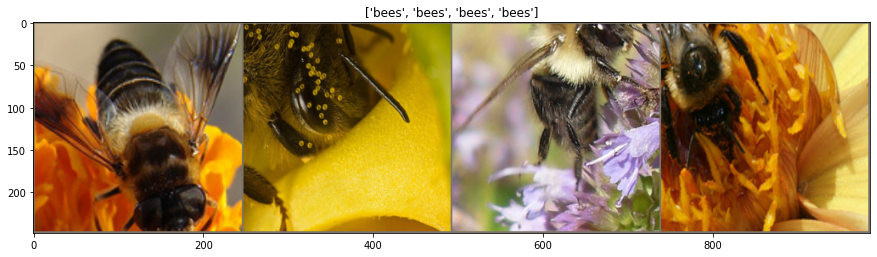

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15, 12))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
for i in dataloaders['train']:
    print(i[0][0])
    break

tensor([[[-0.5253, -0.5253, -0.4911,  ..., -0.6965, -0.6965, -0.6623],
         [-0.4911, -0.4911, -0.4568,  ..., -0.7137, -0.7137, -0.6965],
         [-0.4739, -0.4568, -0.4397,  ..., -0.7137, -0.7137, -0.6965],
         ...,
         [ 0.3309,  0.3652,  0.3652,  ..., -0.0116, -0.0116,  0.0227],
         [ 0.3138,  0.3138,  0.3138,  ...,  0.0227,  0.0398,  0.0398],
         [ 0.2796,  0.3138,  0.3309,  ...,  0.0398,  0.0569,  0.0741]],

        [[-0.6702, -0.6702, -0.6352,  ..., -0.8627, -0.8627, -0.8277],
         [-0.6527, -0.6352, -0.6176,  ..., -0.8452, -0.8452, -0.8277],
         [-0.6527, -0.6176, -0.6176,  ..., -0.8277, -0.8277, -0.8102],
         ...,
         [ 0.9055,  0.8880,  0.8880,  ...,  0.1877,  0.1877,  0.1877],
         [ 0.9055,  0.8880,  0.8880,  ...,  0.2402,  0.2227,  0.2227],
         [ 0.8704,  0.9055,  0.9055,  ...,  0.2402,  0.2227,  0.1877]],

        [[-0.7413, -0.7587, -0.7413,  ..., -0.8981, -0.8981, -0.8633],
         [-0.7936, -0.7587, -0.7064,  ..., -0

### Обучение моделей

Следующая функция будет использоваться для обучения модели. Аргументы:  
* model $-$ нейросеть
* loss $-$ оптимизируемая функция (criterion, cost function, objective)
* optimizer $-$ оптимизационный алгоритм
* scheduler $-$ политика изменения learning_rate
* num_epochs $-$ количество итераций обучения

**Задание**: Вам нужно модифицировать эту функцию, чтобы она возвращала ещё и массивы loss'а на обучающей и валидационной выборках (чтобы потом Вы могли нарисовать графики). Можете модифицировать эту функцию как угодно, лишь бы она правильно работала.

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # to record losses (not in PyTorch tutorial)
    losses = {'train': [], 'val': []}

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            # record losses (not in PyTorch tutorial)
            losses[phase].append(epoch_loss)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, losses

* Функция для отрисовки тестовых изображений и предсказаний для них:

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

* Функция для измерения точности модели на валидационном датасете

In [ ]:
def evaluate(model):
    model.train(False)
    
    runninig_correct = 0
    for data in dataloaders['val']:
        # получаем картинки и метки
        inputs, labels = data[0].to(device), data[1].to(device)
            
        # forard pass
        output = model(inputs)
        _, predicted = torch.max(output, 1)
        
        runninig_correct += int(torch.sum(predicted == labels))
        
    return runninig_correct / dataset_sizes['val']

### Задание

Для каждой из следующих нейросетей:
* **AlexNet** (уже сделано в примере)
* **VGG16**
* **Inception_v3**

Напишите код и выведите результат (график лосса, accuracy и вывод примера классификации картинок с визализацией (с помощью функции `vizualize_model()`)) для трёх способов:
* Использование готовой нейросети **"из коробки"**
* Использование нейросети как **Feature Extractor**
* **Fine Tuning** нейросети

Для каждого пункта нужно:
* сделать с сетью то, что нужно в пункте ("из коробки", FE или FT)
* вывести график loss'а на обучающей и на валидационной выборке
* вывести качество модели (accuracy) на валидационной (тестовой) выборке
* (по желанию) использовать функцию visualize_model()

In [ ]:
recorded_accuracies = {}

### AlexNet

*ПРИМЕЧАНИЕ: Здесь не выведены графики loss'а и не использована visualize_model(). От Вас это ожидается.*

Загрузка модели:

In [ ]:
model = models.alexnet(pretrained=True)

Посмотрим, что внутри:

In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Видим, что на вход классификатору (classifier) подаётся *9216 признаков*. Это и будет размер входа для нашего нового классификатора.

* **Fine Tuning** способ

Сконфигурируем - изменим FC-слой и зададим *cost function* и *оптимизирующий алгоритм*:

(*по умолчанию backpropagation распространяется на все слои, поэтому здесь мы только заменяем FC-слой на свой классификатор*)

In [ ]:
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216
# Заменяем Fully-Connected слой на наш линейный классификатор
model.classifier = nn.Linear(num_features, 2)

# to GPU if available
model = model.to(device)

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model, losses = train_model(model, loss_fn, optimizer_ft, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 1.0699 Acc: 0.5369
val Loss: 0.6880 Acc: 0.5132

Epoch 1/24
----------
train Loss: 0.7071 Acc: 0.4959
val Loss: 0.6924 Acc: 0.5592

Epoch 2/24
----------
train Loss: 0.6934 Acc: 0.5041
val Loss: 0.6929 Acc: 0.4605

Epoch 3/24
----------
train Loss: 0.6935 Acc: 0.5041
val Loss: 0.6928 Acc: 0.5526

Epoch 4/24
----------
train Loss: 0.6940 Acc: 0.5205
val Loss: 0.6929 Acc: 0.5526

Epoch 5/24
----------
train Loss: 0.6935 Acc: 0.4959
val Loss: 0.6920 Acc: 0.5395

Epoch 6/24
----------
train Loss: 0.6932 Acc: 0.4836
val Loss: 0.6932 Acc: 0.4539

Epoch 7/24
----------
train Loss: 0.6924 Acc: 0.5164
val Loss: 0.6933 Acc: 0.4539

Epoch 8/24
----------
train Loss: 0.6924 Acc: 0.5164
val Loss: 0.6933 Acc: 0.4539

Epoch 9/24
----------
train Loss: 0.6910 Acc: 0.5082
val Loss: 0.6939 Acc: 0.4539

Epoch 10/24
----------
train Loss: 0.6908 Acc: 0.5123
val Loss: 0.6946 Acc: 0.4539

Epoch 11/24
----------
train Loss: 0.6897 Acc: 0.5041
val Loss: 0.6961 Acc: 0.4605

Ep

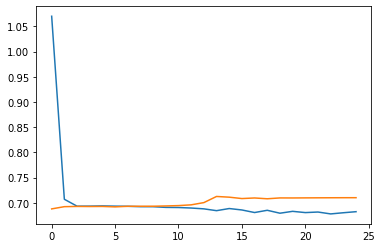

In [ ]:
# Построим график лосса при обучении и валидации

#Ваш код здесь
plt.plot(losses['train'])
plt.plot(losses['val'])

In [ ]:
torch.save(model.state_dict(), 'AlexNet_fine_tune.pth')

In [ ]:
model.load_state_dict(torch.load('AlexNet_fine_tune.pth'))

<All keys matched successfully>

In [ ]:
print("Accuracy: {0:.4f}".format(evaluate(model)))
recorded_accuracies['AlexNet_fine_tune'] = evaluate(model)

Accuracy: 0.5592


In [ ]:
recorded_accuracies

{'AlexNet_fine_tune': 0.5592105263157895}

Видим, что Fine Tuning AlexNet'а не дал хороших результатов, поскольку качество получается ~70%, что маловато для свёрточной нейросети для задачи классификации картинок. Посмотрим, как будет с AlexNet в роли Feature Extractor'а.

* **Feature Extractor** способ:

In [ ]:
model_extractor = models.alexnet(pretrained=True)

Помним, что по-умолчанию все слои нейросети обучаются заново:

In [ ]:
for param in model_extractor.parameters():
    print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


Сделаем так, чтобы на них *не распространялся backpropagation* (заморозим их), и подменим классификатор (ведь старый уже с весами для ImageNet'а).

In [ ]:
# замораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.classifier = nn.Linear(num_features, 2)

# to GPU if available
model_extractor = model_extractor.to(device)

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# Обучаем только классификатор
optimizer = optim.SGD(model_extractor.classifier.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
%%time
model_extractor,losses = train_model(model_extractor, loss_fn, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 2.8282 Acc: 0.7582
val Loss: 5.9217 Acc: 0.7566

Epoch 1/24
----------
train Loss: 4.5337 Acc: 0.7951
val Loss: 4.0061 Acc: 0.8816

Epoch 2/24
----------
train Loss: 3.7872 Acc: 0.8402
val Loss: 4.0697 Acc: 0.8618

Epoch 3/24
----------
train Loss: 4.5334 Acc: 0.8361
val Loss: 5.8017 Acc: 0.8289

Epoch 4/24
----------
train Loss: 3.5743 Acc: 0.8607
val Loss: 6.4605 Acc: 0.8618

Epoch 5/24
----------
train Loss: 2.5424 Acc: 0.8770
val Loss: 7.6843 Acc: 0.8355

Epoch 6/24
----------
train Loss: 2.1963 Acc: 0.8811
val Loss: 6.9375 Acc: 0.8289

Epoch 7/24
----------
train Loss: 1.6570 Acc: 0.9139
val Loss: 6.6096 Acc: 0.8421

Epoch 8/24
----------
train Loss: 1.1691 Acc: 0.9180
val Loss: 6.4943 Acc: 0.8421

Epoch 9/24
----------
train Loss: 2.3275 Acc: 0.9057
val Loss: 6.1701 Acc: 0.8421

Epoch 10/24
----------
train Loss: 1.6888 Acc: 0.9180
val Loss: 6.0110 Acc: 0.8553

Epoch 11/24
----------
train Loss: 1.1077 Acc: 0.9385
val Loss: 5.7906 Acc: 0.8487

Ep

In [ ]:
torch.save(model_extractor.state_dict(), 'AlexNet_extractor.pth')

In [ ]:
model_extractor.load_state_dict(torch.load('AlexNet_extractor.pth'))

<All keys matched successfully>

In [ ]:
print("Accuracy: {0:.4f}".format(evaluate(model_extractor)))

Accuracy: 0.8816


Видим, что качество намного лучше: ~90%.

* **Смешанный** способ:
Мы будем обучать не только последний **fully connected** слой, но и несколько предпоследних

In [ ]:
model_mixed = models.alexnet(pretrained=True)

In [ ]:
layers_to_unfreeze = 5

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_mixed.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False
    
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216
# Заменяем Fully-Connected слой на наш линейный классификатор
model_mixed.classifier = nn.Linear(num_features, 2)

# to GPU if available
model_mixed = model_mixed.to(device)

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# Обучаем последние layers_to_unfreeze слоев из сверточной части и fully connected слой 
# parameters() возвращает просто список тензоров парамтеров, поэтому два таких списка можно сложить
optimizer = optim.SGD(list(model_mixed.features.parameters())[-layers_to_unfreeze:] + 
                      list(model_mixed.classifier.parameters()), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
%%time
_, losses = train_model(model_mixed, loss_fn, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 1.9228 Acc: 0.6352
val Loss: 0.6264 Acc: 0.6250

Epoch 1/24
----------
train Loss: 0.6083 Acc: 0.7090
val Loss: 0.5869 Acc: 0.7961

Epoch 2/24
----------
train Loss: 0.6146 Acc: 0.6926
val Loss: 0.6606 Acc: 0.6908

Epoch 3/24
----------
train Loss: 0.4454 Acc: 0.7828
val Loss: 0.5676 Acc: 0.7697

Epoch 4/24
----------
train Loss: 0.4175 Acc: 0.8115
val Loss: 0.6138 Acc: 0.8158

Epoch 5/24
----------
train Loss: 0.3981 Acc: 0.8320
val Loss: 0.5515 Acc: 0.8421

Epoch 6/24
----------
train Loss: 0.2963 Acc: 0.8484
val Loss: 0.5961 Acc: 0.8289

Epoch 7/24
----------
train Loss: 0.2874 Acc: 0.9016
val Loss: 0.5266 Acc: 0.8684

Epoch 8/24
----------
train Loss: 0.2411 Acc: 0.8893
val Loss: 0.5406 Acc: 0.8684

Epoch 9/24
----------
train Loss: 0.2489 Acc: 0.9262
val Loss: 0.5105 Acc: 0.8750

Epoch 10/24
----------
train Loss: 0.2295 Acc: 0.8975
val Loss: 0.5258 Acc: 0.8816

Epoch 11/24
----------
train Loss: 0.2378 Acc: 0.9098
val Loss: 0.5273 Acc: 0.8684

Ep

In [ ]:
torch.save(model_mixed.state_dict(), 'AlexNet_mixed.pth')

In [ ]:
model_mixed.load_state_dict(torch.load('AlexNet_mixed.pth'))

<All keys matched successfully>

In [ ]:
print("Accuracy: {0:.4f}".format(evaluate(model_mixed)))

Accuracy: 0.8816


**Вопрос 1 (важный):** С чем связано повышение качества если мы перестаем учить всю сеть? (Подсказка: посмотрите на датасет и на то, как он согласуется с 4-мя ситуациями, описанными выше)

**Ответ (важный):** <Ваш ответ> Мало данных, данные похожие. Хотим дообучить, но не переобучить.

**Вопрос 2**: Почему разморозка последних слоев не дает прироста к точности, хотя разморозить несколько послдних слоев обычно хорошеее решение для классификации похожего датасета? (Вопрос на внимательность)

**Ответ:** <Ваш ответ> У нас очень мало данных и очень сильная сеть (representation power, even with only last 5 feature layers unfreezed), поэтому мы скорее всего переобучились

### Другие, более современные нейросети

**Вопрос:** Какую стратегию Вы выберете, учитывая размер и специфику нового датасета?

**Ответ:** <Ваш ответ> resnet18 - the last one (examle taken from the PyTorch tutorial)

### VGG16

In [ ]:
# Ваш код здесь
model_extractor = models.vgg16(pretrained=True)

# замораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 25088
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.classifier = nn.Linear(num_features, 2)

# to GPU if available
model_extractor = model_extractor.to(device)

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# Обучаем только классификатор
optimizer = optim.SGD(model_extractor.classifier.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


In [ ]:
model_extractor

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Запустите обучение
model_extractor, losses = train_model(model_extractor, loss_fn, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 3.3323 Acc: 0.7746
val Loss: 3.4045 Acc: 0.8355

Epoch 1/24
----------
train Loss: 1.6201 Acc: 0.9016
val Loss: 1.9109 Acc: 0.9408

Epoch 2/24
----------
train Loss: 1.7865 Acc: 0.9016
val Loss: 4.7358 Acc: 0.8487

Epoch 3/24
----------
train Loss: 1.4368 Acc: 0.9016
val Loss: 2.0205 Acc: 0.9145

Epoch 4/24
----------
train Loss: 1.0707 Acc: 0.9385
val Loss: 2.2715 Acc: 0.9342

Epoch 5/24
----------
train Loss: 1.4474 Acc: 0.9303
val Loss: 2.2541 Acc: 0.9539

Epoch 6/24
----------
train Loss: 1.6970 Acc: 0.9303
val Loss: 2.3291 Acc: 0.9474

Epoch 7/24
----------
train Loss: 0.7235 Acc: 0.9467
val Loss: 2.2328 Acc: 0.9474

Epoch 8/24
----------
train Loss: 0.9550 Acc: 0.9549
val Loss: 2.1761 Acc: 0.9539

Epoch 9/24
----------
train Loss: 0.9635 Acc: 0.9508
val Loss: 2.2110 Acc: 0.9474

Epoch 10/24
----------
train Loss: 1.1066 Acc: 0.9467
val Loss: 2.2093 Acc: 0.9408

Epoch 11/24
----------
train Loss: 0.6058 Acc: 0.9590
val Loss: 2.0830 Acc: 0.9539

Ep

In [ ]:
torch.save(model_extractor.state_dict(), 'VGG16.pth')

In [ ]:
model_extractor.load_state_dict(torch.load('VGG16.pth'))

<All keys matched successfully>

In [ ]:
print("Accuracy: {0:.4f}".format(evaluate(model_extractor)))

Accuracy: 0.9539


### Inception_v3

In [ ]:
# Нужно поменять размер картинок на 299, иначе будет ошибка, так как размерность станет отрицательной.
# Это вызвано тем, что нейросеть изначально обучалась на картинках размера 299.

# Результирующий размер картинок определяется трансформациями
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(299),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Сам объект датасета
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}

# специальный класс для загрузки данных в виде батчей
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                              shuffle=True, num_workers=4)
               for x in ['train', 'val']}

In [ ]:
# Ваш код здесь
model_extractor = models.inception_v3(pretrained=True)

In [ ]:
model_extractor

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [ ]:
# Ваш код здесь
# model_extractor = models.inception_v3(pretrained=True)

# замораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 2048
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.fc = nn.Linear(num_features, 2)

# to GPU if available
model_extractor = model_extractor.to(device)

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# Обучаем только классификатор
optimizer = optim.SGD(model_extractor.fc.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
%%time
# inception has auxillary outputs to conquer the vanishing gradients problem
# we ignore them here because we only use it as a feature extractor
model_extractor.aux_logits = False


model_extractor, losses = train_model(model_extractor, loss_fn, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6250 Acc: 0.6516
val Loss: 0.3913 Acc: 0.8947

Epoch 1/24
----------
train Loss: 0.4851 Acc: 0.7705
val Loss: 0.3529 Acc: 0.8618

Epoch 2/24
----------
train Loss: 0.5027 Acc: 0.7459
val Loss: 0.3387 Acc: 0.8882

Epoch 3/24
----------
train Loss: 0.6073 Acc: 0.7008
val Loss: 0.2399 Acc: 0.9145

Epoch 4/24
----------
train Loss: 0.5031 Acc: 0.7623
val Loss: 0.3310 Acc: 0.8618

Epoch 5/24
----------
train Loss: 0.3949 Acc: 0.8197
val Loss: 0.2486 Acc: 0.8816

Epoch 6/24
----------
train Loss: 0.4926 Acc: 0.7664
val Loss: 0.2126 Acc: 0.9079

Epoch 7/24
----------
train Loss: 0.4051 Acc: 0.7992
val Loss: 0.2139 Acc: 0.9211

Epoch 8/24
----------
train Loss: 0.4155 Acc: 0.8033
val Loss: 0.2215 Acc: 0.8816

Epoch 9/24
----------
train Loss: 0.4405 Acc: 0.7951
val Loss: 0.2289 Acc: 0.8882

Epoch 10/24
----------
train Loss: 0.3996 Acc: 0.8320
val Loss: 0.2221 Acc: 0.8816

Epoch 11/24
----------
train Loss: 0.4028 Acc: 0.7910
val Loss: 0.2188 Acc: 0.9079

Ep

In [ ]:
torch.save(model_extractor.state_dict(), 'Inceptionv3.pth')

In [ ]:
model_extractor.load_state_dict(torch.load('Inceptionv3.pth'))

<All keys matched successfully>

In [ ]:
print("Accuracy: {0:.4f}".format(evaluate(model_extractor)))

Accuracy: 0.9211


Finetuning the convnet
----------------------

Load a pretrained model and reset final fully connected layer.




In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


Train and evaluate
^^^^^^^^^^^^^^^^^^

It should take around 15-25 min on CPU. On GPU though, it takes less than a
minute.




In [ ]:
model_ft, losses = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                               num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6413 Acc: 0.6885
val Loss: 0.7119 Acc: 0.7368

Epoch 1/24
----------
train Loss: 0.6759 Acc: 0.7623
val Loss: 0.2245 Acc: 0.9013

Epoch 2/24
----------
train Loss: 0.3971 Acc: 0.8238
val Loss: 0.3135 Acc: 0.8618

Epoch 3/24
----------
train Loss: 0.4401 Acc: 0.8279
val Loss: 0.2254 Acc: 0.9145

Epoch 4/24
----------
train Loss: 0.4968 Acc: 0.7787
val Loss: 0.3009 Acc: 0.8750

Epoch 5/24
----------
train Loss: 0.3437 Acc: 0.8402
val Loss: 0.7473 Acc: 0.7697

Epoch 6/24
----------
train Loss: 0.4512 Acc: 0.8238
val Loss: 0.2258 Acc: 0.9145

Epoch 7/24
----------
train Loss: 0.3079 Acc: 0.8648
val Loss: 0.2184 Acc: 0.9079

Epoch 8/24
----------
train Loss: 0.3414 Acc: 0.8443
val Loss: 0.2300 Acc: 0.9079

Epoch 9/24
----------
train Loss: 0.2638 Acc: 0.8934
val Loss: 0.2756 Acc: 0.9013

Epoch 10/24
----------
train Loss: 0.3219 Acc: 0.8484
val Loss: 0.1921 Acc: 0.9408

Epoch 11/24
----------
train Loss: 0.2536 Acc: 0.8975
val Loss: 0.2369 Acc: 0.9013

Ep

In [ ]:
visualize_model(model_ft)

Output hidden; open in https://colab.research.google.com to view.

ConvNet as fixed feature extractor
----------------------------------

Here, we need to freeze all the network except the final layer. We need
to set ``requires_grad == False`` to freeze the parameters so that the
gradients are not computed in ``backward()``.

You can read more about this in the documentation
[here](https://pytorch.org/docs/notes/autograd.html#excluding-subgraphs-from-backward).




In [ ]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

Train and evaluate
^^^^^^^^^^^^^^^^^^

On CPU this will take about half the time compared to previous scenario.
This is expected as gradients don't need to be computed for most of the
network. However, forward does need to be computed.




In [ ]:
model_conv, losses = train_model(model_conv, criterion, optimizer_conv,
                                 exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5691 Acc: 0.6926
val Loss: 0.8699 Acc: 0.5395

Epoch 1/24
----------
train Loss: 0.5436 Acc: 0.7131
val Loss: 0.2137 Acc: 0.9408

Epoch 2/24
----------
train Loss: 0.5013 Acc: 0.7746
val Loss: 0.2235 Acc: 0.9342

Epoch 3/24
----------
train Loss: 0.4419 Acc: 0.7869
val Loss: 0.1944 Acc: 0.9539

Epoch 4/24
----------
train Loss: 0.4523 Acc: 0.7623
val Loss: 0.1932 Acc: 0.9408

Epoch 5/24
----------
train Loss: 0.5327 Acc: 0.7623
val Loss: 0.2319 Acc: 0.9145

Epoch 6/24
----------
train Loss: 0.4609 Acc: 0.7910
val Loss: 0.2429 Acc: 0.9079

Epoch 7/24
----------
train Loss: 0.3840 Acc: 0.8566
val Loss: 0.1891 Acc: 0.9474

Epoch 8/24
----------
train Loss: 0.3047 Acc: 0.8607
val Loss: 0.1789 Acc: 0.9474

Epoch 9/24
----------
train Loss: 0.3471 Acc: 0.8279
val Loss: 0.1948 Acc: 0.9408

Epoch 10/24
----------
train Loss: 0.4108 Acc: 0.7746
val Loss: 0.1891 Acc: 0.9539

Epoch 11/24
----------
train Loss: 0.2927 Acc: 0.8730
val Loss: 0.1849 Acc: 0.9539

Ep

In [ ]:
visualize_model(model_conv)

plt.ioff()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Вопрос:** Какая из сетей оказалась наилучшей? Как думаете, почему?

**Ответ:** <Ваш ответ>


<h2 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *cs231n: http://cs231n.github.io/transfer-learning/*

2). *Туториал на PyTorch Tutorials: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial*

3). *Статья на Medium про TL в PyTorch: https://medium.com/@14prakash/almost-any-image-classification-problem-using-pytorch-i-am-in-love-with-pytorch-26c7aa979ec4*  